# Prebiotic Molecule Accumulation Model 

## Model Overview

This notebook implements a time-dependent box model to simulate the accumulation of prebiotic organic molecules in a hypothetical early Earth surface environment. By representing the pond as an open system, we track the net accumulation of organic material as a function of production, degradation, and transport. The system’s evolution is governed by a **first-order ordinary differential equation (ODE)** solved via **numerical integration**.

## Model Assumptions.

To establish a baseline for this computational series, the following assumptions are made:

1. The system is treated as a single, well-mixed environment, such that the concentration of prebiotic molecules is spatially uniform at all times.

2. Prebiotic molecule **production** occurs at a constant average rate, representing continuous abiotic synthesis.

3. **Molecular destruction** (UV photolysis, hydrolysis) and **environmental loss** (seepage) processes are proportional to the current molecule concentration.

4. External input (e.g., rainfall-driven delivery or concentration effects) are treated as a continuous periodic function rather than discrete stochastic events.

5. The model does not attempt to represent specific chemical species, but rather an abstract concentration of generic prebiotic organic molecules.

## Mathematical Formulation


* Let **C(t)** represent the concentration of prebiotic molecules at time **t**

The rate of change of C(t) is given by:

**dC/dt = P − D·C − L·C + R(t)**


 - The equation represents a balance between processes that *increase* molecular concentration and processes that *decrease* it

## Parameter Definitions.


The parameters used in the model are defined as follows:

- **C(t)**: Concentration of prebiotic organic molecules at time t.

- **P**: Production rate of prebiotic molecules- continuous synthesis processes occurring in the environment.

- **D**: Destruction rate constant- molecular breakdown due to environmental factors such as UV radiation or thermal instability.

- **L**: Loss rate constant- physical removal processes such as dilution, seepage, or degradation not explicitly modeled.

- **R(t)**: Time-dependent external input- episodic environmental contributions 

## Numerical Integration

The model is integrated over time using the `solve_ivp` function from the SciPy library.



In [14]:
# import necessary libraries

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [15]:
# the model function - 
def prebiotic_model(t, C, P, D, L, R0, T):
    """
    Differential equation describing prebiotic molecule accumulation.
    """
    R = R0 * np.sin(2 * np.pi * t / T)**2
    dCdt = P - D * C - L * C + R
    return dCdt

# i.e., given time and curent C, compute dC/dt

In [16]:
# Time span (start, end) - arbitrary
t_start = 0
t_end = 100

# Initial concentration
C0 = [0.0]

In [17]:
# Parameter values (exploratory)
P = 0.5    # production rate
D = 0.02   # destruction rate
L = 0.01   # loss rate
R0 = 1.0   # maximum rainfall contribution
T = 10     # rainfall cycle period

In [18]:
# solving teh equation 

solution = solve_ivp(
    prebiotic_model,
    (t_start, t_end),
    C0,
    args=(P, D, L, R0, T),
    dense_output=True
)

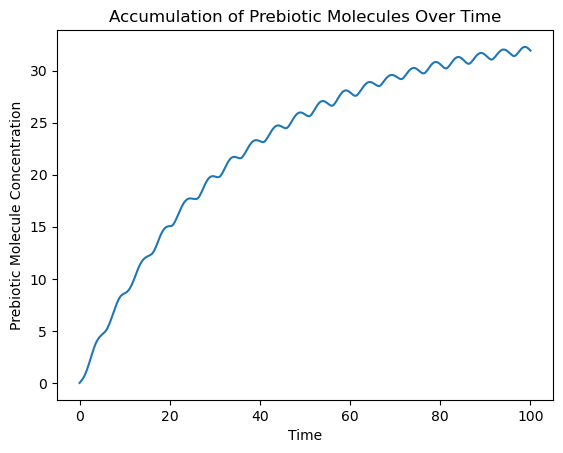

In [42]:
# plot

t = np.linspace(t_start, t_end, 500)
C = solution.sol(t)[0]

plt.figure()
plt.plot(t, C)
plt.xlabel("Time")
plt.ylabel("Prebiotic Molecule Concentration")
plt.title("Accumulation of Prebiotic Molecules Over Time")
plt.show()

The Plot: shows that prebiotic molecule concentration **increases** from an initially pristine state and exhibits time-dependent fluctuations driven by periodic environmental input, eventually approaching a dynamically balanced regime.

## Sensitivity Analysis


### 1. sensitivity to periodic input term (R₀) while keeping all other parameters fixed. 

In [58]:
# checking sensitivity to rainfaill. 
R0_value = [0.2, 0.6, 1.0, 1.5]

def run_model(R0_value):
    """ function to run the model with different rainfall strength""" # initial rainfall strenth = 1.0
    solution = solve_ivp(
        prebiotic_model,
        (t_start, t_end),
        C0,
        args=(P, D, L, R0_value, T),
        dense_output=True
    )
    t = np.linspace(t_start, t_end, 500)
    C = solution.sol(t)[0]
    return t, C

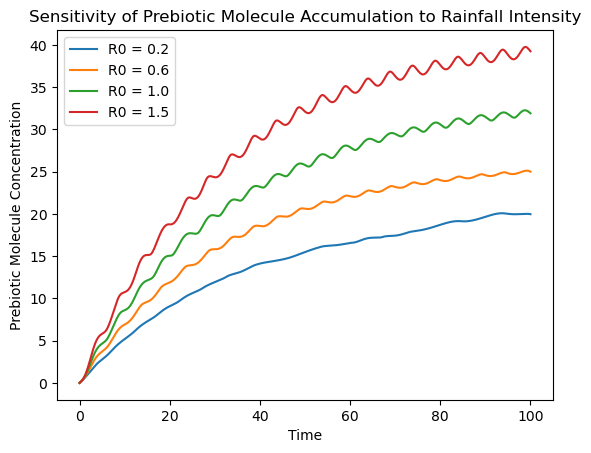

In [48]:
#plot

plt.figure()

for R0_val in R0_value:
    t, C = run_model(R0_val)
    plt.plot(t,C, label=f"R0 = {R0_val}")

plt.xlabel("Time")
plt.ylabel("Prebiotic Molecule Concentration")
plt.title("Sensitivity of Prebiotic Molecule Accumulation to Rainfall Intensity")
plt.legend()
plt.show()

Increasing R₀ leads to higher average concentrations and more pronounced temporal fluctuations. this indicates that episodic environmental input plays a significant role in regulating prebiotic molecule availability in the model.

### 2. Sensitivity to Destruction Rate (D)

In [64]:
D_values = [0.005, 0.02, 0.05]

def run_model_D(D_value):
    solution = solve_ivp(
        prebiotic_model,
        (t_start, t_end),
        C0,
        args=(P, D_value, L, R0, T),
        dense_output=True
    )
    t = np.linspace(t_start, t_end, 500)
    C = solution.sol(t)[0]
    return t, C

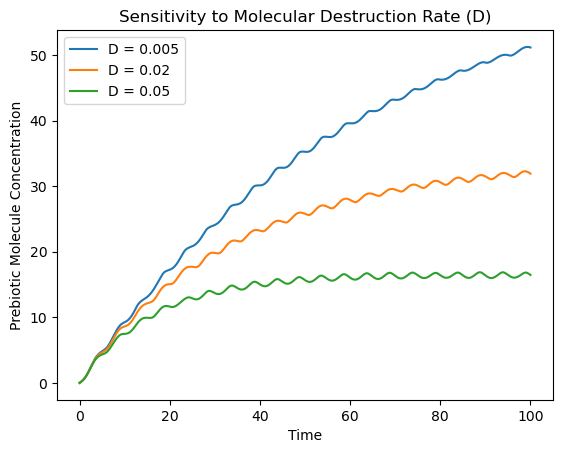

In [66]:
plt.figure()

for D_val in D_values:
    t, C = run_model_D(D_val)
    plt.plot(t, C, label=f"D = {D_val}")

plt.xlabel("Time")
plt.ylabel("Prebiotic Molecule Concentration")
plt.title("Sensitivity to Molecular Destruction Rate (D)")
plt.legend()
plt.show()


Increasing the molecular destruction rate leads to a significant reduction in overall prebiotic molecule concentration, indicating that chemical stability strongly constrains accumulation even under favorable environmental input.

### 3. Sensitivity to Loss Rate (L)

In [70]:
L_values = [0.005, 0.02, 0.05]

def run_model_L(L_value):
    solution = solve_ivp(
        prebiotic_model,
        (t_start, t_end),
        C0,
        args=(P, D, L_value, R0, T),
        dense_output=True
    )
    t = np.linspace(t_start, t_end, 500)
    C = solution.sol(t)[0]
    return t, C

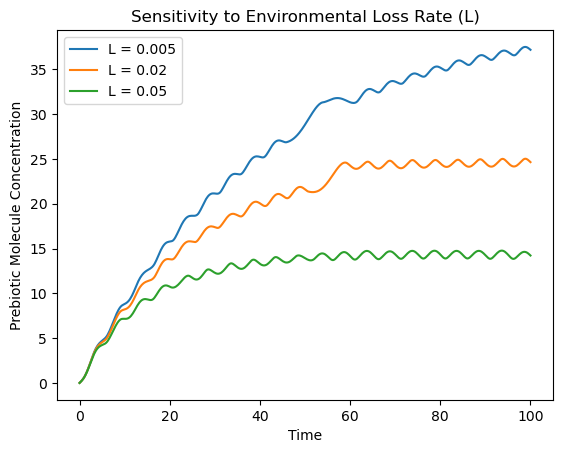

In [72]:
plt.figure()

for L_val in L_values:
    t, C = run_model_L(L_val)
    plt.plot(t, C, label=f"L = {L_val}")

plt.xlabel("Time")
plt.ylabel("Prebiotic Molecule Concentration")
plt.title("Sensitivity to Environmental Loss Rate (L)")
plt.legend()
plt.show()


Increasing the environmental loss rate reduces molecular concentration, but the system remains responsive to periodic input, suggesting that replenishment mechanisms may partially offset physical removal processes.

## Results


## Discussion